In [1]:
import numpy as np

In [2]:
import pandas as pd

# Data Structures

# 1 Series

Séries são arrays on-dimensional

In [4]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e']); s

a   -1.266650
b   -0.396355
c   -0.005548
d   -0.152039
e    0.774928
dtype: float64

In [5]:
type(s)

pandas.core.series.Series

In [6]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
# Se não definir um index ele assume um auto complete
pd.Series(np.random.randn(5))

0   -0.637752
1   -0.234643
2   -0.488026
3    2.964204
4   -0.465178
dtype: float64

In [8]:
# Series de dicionários (dict)
d = {
    'a': 0.,
    'b': 1.,
    'c': 2.
}

In [9]:
# O índice do dicionario assume o index da série
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [10]:
# note que a série assumiu os mesmos índicies e o que não tinha, foi criado uma linha NaN (Not a Number)
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [11]:
# você criar uma série com um unico valor como data e uma lista de index, esses assumiram este mesmo valor
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

# 1.1 Series is ndarray-like

In [12]:
s[0]

-1.2666497781446271

In [13]:
s[:3]

a   -1.266650
b   -0.396355
c   -0.005548
dtype: float64

In [14]:
s[s > s.median()]

c   -0.005548
e    0.774928
dtype: float64

In [15]:
s[[4, 3, 1]]

e    0.774928
d   -0.152039
b   -0.396355
dtype: float64

In [16]:
np.exp(s)

a    0.281774
b    0.672768
c    0.994468
d    0.858955
e    2.170437
dtype: float64

# 1.2 Series is dict-like

In [17]:
s['a']

-1.2666497781446271

In [18]:
s['e'] = 12.

In [19]:
s

a    -1.266650
b    -0.396355
c    -0.005548
d    -0.152039
e    12.000000
dtype: float64

In [20]:
'e' in s

True

In [21]:
'f' in s

False

In [23]:
s['f'] # Se não existir a chave, gera uma exception

KeyError: 'f'

In [24]:
s.get('a')

-1.2666497781446271

In [25]:
s.get('f') # não retorna nada

In [26]:
s.get('f', np.nan) # transforma a falta de resultado em um nan (not a number)

nan

# 1.3 Vectorized operations and label alinment with Series

In [31]:
s

a    -1.266650
b    -0.396355
c    -0.005548
d    -0.152039
e    12.000000
dtype: float64

In [32]:
# Somando Séries
s + s

a    -2.533300
b    -0.792710
c    -0.011095
d    -0.304077
e    24.000000
dtype: float64

In [33]:
# Mutiplicando Séries por constant
s * 2

a    -2.533300
b    -0.792710
c    -0.011095
d    -0.304077
e    24.000000
dtype: float64

In [37]:
# Somando parcialmente Series
s[1:] + s[:-1]

a         NaN
b   -0.792710
c   -0.011095
d   -0.304077
e         NaN
dtype: float64

# 1.3 name attribute

In [38]:
s = pd.Series(np.random.randn(5), name='something'); s

0    0.113471
1   -0.629222
2    0.154490
3   -0.177946
4    1.342087
Name: something, dtype: float64

In [40]:
s.name

'something'

In [41]:
s2 = s.rename('different')
s2.name

'different'

In [42]:
s2.name == 'different'

True

# 2 DataFrame

DataFrame é uma estrutuda de dados 2-dimensional

In [43]:
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

In [44]:
df = pd.DataFrame(d); df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [46]:
# Em DataFrame o indice assume a ordem de sua implementação
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [48]:
# Em DataFrame Ao setar columns, caso não conste no dicionário criado, ele cria e assume o valor NaN (not a number)
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [49]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [50]:
df.columns

Index(['one', 'two'], dtype='object')

In [52]:
type(df.columns)

pandas.core.indexes.base.Index

### 2.1 From dict of ndarray / lists

In [53]:
d = {
    'one': [1., 2., 3., 4.],
    'two': [4., 3., 2., 1.]
}

In [54]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [55]:
# assume a definição do inndice
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### 2.2 From structured or record array

In [56]:
data = np.zeros((2,), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])

In [57]:
data

array([(0,  0., b''), (0,  0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [58]:
data[:] = [(1, 2., 'hello'), (2, 3., 'World')]

In [59]:
data

array([(1,  2., b'hello'), (2,  3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [61]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'hello'
1,2,3.0,b'World'


In [62]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'hello',1,2.0
1,b'World',2,3.0


### 2.3 From a list of dicts

In [63]:
data2 = [{'a': 1,'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [64]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [65]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [67]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


### 2.4 From a dict of tuples

In [69]:
pd.DataFrame({
    ('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
    ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
    ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
    ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
    ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}
})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### 2.5 Alternate Constructors

In [71]:
data

array([(1,  2., b'hello'), (2,  3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [72]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'hello',1,2.0
b'World',2,3.0


In [73]:
pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])])

,A,B
0,1,4
1,2,5
2,3,6


In [74]:
pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])],
                       orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


### 2.6 Column selection, addition, deletion

In [75]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [76]:
df['three'] = df['one'] * df['two']

In [77]:
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [78]:
df['flag'] = df['one'] > 2

In [79]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [80]:
del df['two']

In [82]:
three = df.pop('three')

In [83]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [85]:
df['foo'] = 'bar' ;df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [86]:
df['one_trunc'] = df['one'][:2]

In [87]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [94]:
# 2 = indice das colunas  0,1,2 (terceira coluna)
df.insert(2, 'bar', df['one']); df

,one,flag,bar,foo,one_trunc
a,1.0,False,1.0,bar,1.0
b,2.0,False,2.0,bar,2.0
c,3.0,True,3.0,bar,NaN
d,NaN,False,NaN,bar,NaN


### 2.7 Assinging New Columns in Method Chains

In [98]:
iris = pd.read_csv('../../pandas/data/pydata/iris.data')

In [99]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
# criando colunas com o método assign
(iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength']).head())

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [104]:
# Mesmo resultado utilizando Lambda
iris.assign(sepal_ratio = lambda x: (x['SepalWidth'] / iris['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


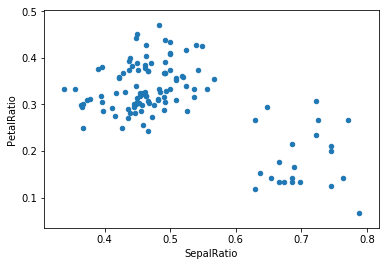

In [106]:
%matplotlib inline
(iris.query('SepalLength > 5')
    .assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength,
            PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
    .plot(kind='scatter', x='SepalRatio', y = 'PetalRatio'))

### 2.8 Indexing / Selection

In [108]:
df

,one,flag,bar,foo,one_trunc
a,1.0,False,1.0,bar,1.0
b,2.0,False,2.0,bar,2.0
c,3.0,True,3.0,bar,NaN
d,NaN,False,NaN,bar,NaN


In [109]:
df.loc['b']

one              2
flag         False
bar              2
foo            bar
one_trunc        2
Name: b, dtype: object

In [110]:
df.iloc[2]

one             3
flag         True
bar             3
foo           bar
one_trunc     NaN
Name: c, dtype: object

In [112]:
df[1:3]

,one,flag,bar,foo,one_trunc
b,2.0,False,2.0,bar,2.0
c,3.0,True,3.0,bar,NaN


### 2.9 Data Alignment and arithmetic

In [115]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D']); df

,A,B,C,D
0,-0.305549,0.644661,2.147586,-0.777683
1,0.487034,0.223853,-1.437475,-1.585993
2,-0.077261,-0.459919,-0.718118,0.178329
3,0.785588,0.132086,1.663015,-0.119956
4,0.122363,-1.875230,1.738731,-1.885495
5,0.733462,0.915617,-0.547214,-0.212400
6,0.270560,1.616682,-0.220963,0.247438
7,-0.254542,0.647145,1.544894,-1.059926
8,-1.765295,1.930937,-0.938130,0.343003
9,0.578470,1.519521,1.407804,-0.044870


In [116]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns = ['A', 'B', 'C']); df2

,A,B,C
0,1.774571,0.133838,1.442166
1,2.268528,0.056359,-1.759790
2,-0.490663,-1.777099,0.374569
3,-1.517266,1.622523,-0.594742
4,-0.199907,-2.189811,-0.175481
5,0.208424,0.431425,0.250147
6,0.550628,-1.087473,-0.081293


In [117]:
df + df2

,A,B,C,D
0,1.469022,0.778499,3.589751,NaN
1,2.755562,0.280212,-3.197264,NaN
2,-0.567924,-2.237018,-0.343549,NaN
3,-0.731678,1.754609,1.068273,NaN
4,-0.077544,-4.065041,1.563250,NaN
5,0.941885,1.347042,-0.297068,NaN
6,0.821188,0.529209,-0.302257,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [118]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.792583,-0.420808,-3.585060,-0.808310
2,0.228288,-1.104580,-2.865704,0.956012
3,1.091137,-0.512575,-0.484570,0.657727
4,0.427912,-2.519891,-0.408855,-1.107813
5,1.039010,0.270956,-2.694800,0.565282
6,0.576108,0.972021,-2.368549,1.025120
7,0.051006,0.002484,-0.602692,-0.282243
8,-1.459747,1.286276,-3.085716,1.120685
9,0.884019,0.874860,-0.739782,0.732813


In [119]:
index = pd.date_range('1/1/2000', periods=8)

In [120]:
index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')

In [121]:
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))
df

,A,B,C
2000-01-01,0.777063,1.512158,1.573526
2000-01-02,0.051433,-1.024357,0.247413
2000-01-03,-1.955714,0.737983,-0.452154
2000-01-04,-0.016912,-0.356766,-0.055482
2000-01-05,-1.192914,-0.714901,0.372357
2000-01-06,-1.006177,-1.780843,0.221905
2000-01-07,1.643998,0.917187,0.232725
2000-01-08,0.609721,1.668106,-0.107697


In [122]:
type(df['A'])

pandas.core.series.Series

In [126]:
df - df['A'] # está deprecated

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df.sub(df['A'], axis=0) # em altenativa ao df - df['A'], é utilizado o método sub()

,A,B,C
2000-01-01,0.0,0.735095,0.796464
2000-01-02,0.0,-1.075790,0.195980
2000-01-03,0.0,2.693696,1.503559
2000-01-04,0.0,-0.339854,-0.038570
2000-01-05,0.0,0.478012,1.565270
2000-01-06,0.0,-0.774665,1.228082
2000-01-07,0.0,-0.726811,-1.411274
2000-01-08,0.0,1.058385,-0.717418


In [128]:
df

,A,B,C
2000-01-01,0.777063,1.512158,1.573526
2000-01-02,0.051433,-1.024357,0.247413
2000-01-03,-1.955714,0.737983,-0.452154
2000-01-04,-0.016912,-0.356766,-0.055482
2000-01-05,-1.192914,-0.714901,0.372357
2000-01-06,-1.006177,-1.780843,0.221905
2000-01-07,1.643998,0.917187,0.232725
2000-01-08,0.609721,1.668106,-0.107697


In [130]:
df * 5+2 # por xemplo a linhas 1 da coluna A = 0,777063 = (0,777063 * 5) + 2 = 5,885313

,A,B,C
2000-01-01,5.885313,9.560788,9.867632
2000-01-02,2.257167,-3.121784,3.237066
2000-01-03,-7.778568,5.689913,-0.260772
2000-01-04,1.915441,0.216172,1.722589
2000-01-05,-3.964568,-1.574507,3.861783
2000-01-06,-3.030887,-6.904214,3.109524
2000-01-07,10.219991,6.585936,3.163623
2000-01-08,5.048606,10.340531,1.461513


In [131]:
df

,A,B,C
2000-01-01,0.777063,1.512158,1.573526
2000-01-02,0.051433,-1.024357,0.247413
2000-01-03,-1.955714,0.737983,-0.452154
2000-01-04,-0.016912,-0.356766,-0.055482
2000-01-05,-1.192914,-0.714901,0.372357
2000-01-06,-1.006177,-1.780843,0.221905
2000-01-07,1.643998,0.917187,0.232725
2000-01-08,0.609721,1.668106,-0.107697


In [132]:
1 / df

,A,B,C
2000-01-01,1.286897,0.661307,0.635515
2000-01-02,19.442612,-0.976222,4.041820
2000-01-03,-0.511322,1.355045,-2.211634
2000-01-04,-59.130087,-2.802961,-18.023794
2000-01-05,-0.838284,-1.398794,2.685597
2000-01-06,-0.993860,-0.561532,4.506439
2000-01-07,0.608273,1.090290,4.296926
2000-01-08,1.640094,0.599482,-9.285278


In [133]:
df

,A,B,C
2000-01-01,0.777063,1.512158,1.573526
2000-01-02,0.051433,-1.024357,0.247413
2000-01-03,-1.955714,0.737983,-0.452154
2000-01-04,-0.016912,-0.356766,-0.055482
2000-01-05,-1.192914,-0.714901,0.372357
2000-01-06,-1.006177,-1.780843,0.221905
2000-01-07,1.643998,0.917187,0.232725
2000-01-08,0.609721,1.668106,-0.107697


In [135]:
df ** 4

,A,B,C
2000-01-01,3.646063e-01,5.228634,6.130503
2000-01-02,6.998122e-06,1.101045,0.003747
2000-01-03,1.462921e+01,0.296609,0.041797
2000-01-04,8.180238e-08,0.016201,0.000009
2000-01-05,2.025050e+00,0.261207,0.019224
2000-01-06,1.024940e+00,10.057783,0.002425
2000-01-07,7.304751e+00,0.707672,0.002933
2000-01-08,1.382054e-01,7.742743,0.000135


In [136]:
# Booleans

In [137]:
df1 = pd.DataFrame({
    'a': [1, 0, 1],
    'b': [0, 1, 1]
}, dtype=bool) 
df1

,a,b
0,True,False
1,False,True
2,True,True


In [138]:
df2 = pd.DataFrame({
    'a': [0, 1, 1],
    'b': [1, 1, 0]
}, dtype=bool) 
df2

,a,b
0,False,True
1,True,True
2,True,False


In [139]:
df1 & df2 # df1 e def2

,a,b
0,False,False
1,False,True
2,True,False


In [149]:
True & False

False

In [148]:
False & True

False

In [147]:
True & True

True

In [146]:
False & False

False

In [150]:
df1

,a,b
0,True,False
1,False,True
2,True,True


In [151]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [152]:
df1 | df2 # df1 ou def2

,a,b
0,True,True
1,True,True
2,True,True


In [154]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [155]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


### 2.10 Transposing

In [158]:
df[:4]

,A,B,C
2000-01-01,0.777063,1.512158,1.573526
2000-01-02,0.051433,-1.024357,0.247413
2000-01-03,-1.955714,0.737983,-0.452154
2000-01-04,-0.016912,-0.356766,-0.055482


In [159]:
df[:4].T

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00
A,0.777063,0.051433,-1.955714,-0.016912
B,1.512158,-1.024357,0.737983,-0.356766
C,1.573526,0.247413,-0.452154,-0.055482


### 2.11 DataFrame interoperability with NumPy functions

In [160]:
df

,A,B,C
2000-01-01,0.777063,1.512158,1.573526
2000-01-02,0.051433,-1.024357,0.247413
2000-01-03,-1.955714,0.737983,-0.452154
2000-01-04,-0.016912,-0.356766,-0.055482
2000-01-05,-1.192914,-0.714901,0.372357
2000-01-06,-1.006177,-1.780843,0.221905
2000-01-07,1.643998,0.917187,0.232725
2000-01-08,0.609721,1.668106,-0.107697


In [161]:
np.exp(df)

,A,B,C
2000-01-01,2.175074,4.536508,4.823628
2000-01-02,1.052779,0.359027,1.280708
2000-01-03,0.141464,2.091712,0.636256
2000-01-04,0.983230,0.699937,0.946029
2000-01-05,0.303336,0.489240,1.451150
2000-01-06,0.365614,0.168496,1.248452
2000-01-07,5.175823,2.502242,1.262034
2000-01-08,1.839918,5.302117,0.897899


In [162]:
type(df)

pandas.core.frame.DataFrame

In [163]:
# Transformando DataFrame em Array (ndarray)
np.asarray(df)

array([[ 0.77706268,  1.51215763,  1.57352637],
       [ 0.05143342, -1.02435684,  0.24741327],
       [-1.95571352,  0.73798267, -0.45215431],
       [-0.01691186, -0.35676557, -0.05548221],
       [-1.19291352, -0.71490138,  0.37235666],
       [-1.00617747, -1.78084272,  0.22190472],
       [ 1.64399827,  0.91718712,  0.23272453],
       [ 0.60972112,  1.66810623, -0.10769737]])

In [164]:
type(np.asarray(df))

numpy.ndarray

In [165]:
df.T.dot(df)

,A,B,C
A,9.941499,4.854699,1.770145
B,4.854699,11.314123,1.184518
C,1.770145,1.184518,2.998371


### 2.12 Console diplay

Arquivos muitos grandes tendem a truncar a exibição no console...

In [166]:
baseball = pd.read_csv('../data/pydata/baseball.csv')

In [167]:
print(baseball)

       id     player  year  stint team  lg    g   ab   r    h  ...    rbi  \
0   88641  womacto01  2006      2  CHN  NL   19   50   6   14  ...    2.0   
1   88643  schilcu01  2006      1  BOS  AL   31    2   0    1  ...    0.0   
2   88645  myersmi01  2006      1  NYA  AL   62    0   0    0  ...    0.0   
3   88649  helliri01  2006      1  MIL  NL   20    3   0    0  ...    0.0   
4   88650  johnsra05  2006      1  NYA  AL   33    6   0    1  ...    0.0   
5   88652  finlest01  2006      1  SFN  NL  139  426  66  105  ...   40.0   
6   88653  gonzalu01  2006      1  ARI  NL  153  586  93  159  ...   73.0   
7   88662   seleaa01  2006      1  LAN  NL   28   26   2    5  ...    0.0   
8   89177  francju01  2007      2  ATL  NL   15   40   1   10  ...    8.0   
9   89178  francju01  2007      1  NYN  NL   40   50   7   10  ...    8.0   
10  89330   zaungr01  2007      1  TOR  AL  110  331  43   80  ...   52.0   
11  89333  witasja01  2007      1  TBA  AL    3    0   0    0  ...    0.0   

In [168]:
baseball.info() # Pegando informações dos detalhes da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
id        100 non-null int64
player    100 non-null object
year      100 non-null int64
stint     100 non-null int64
team      100 non-null object
lg        100 non-null object
g         100 non-null int64
ab        100 non-null int64
r         100 non-null int64
h         100 non-null int64
X2b       100 non-null int64
X3b       100 non-null int64
hr        100 non-null int64
rbi       100 non-null float64
sb        100 non-null float64
cs        100 non-null float64
bb        100 non-null int64
so        100 non-null float64
ibb       100 non-null float64
hbp       100 non-null float64
sh        100 non-null float64
sf        100 non-null float64
gidp      100 non-null float64
dtypes: float64(9), int64(11), object(3)
memory usage: 18.0+ KB


In [169]:
print(baseball.iloc[-20:, :12].to_string())

       id     player  year  stint team  lg    g   ab   r    h  X2b  X3b
80  89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0
81  89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0
82  89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2
83  89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0
84  89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0
85  89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0
86  89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0
87  89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1
88  89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0
89  89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0
90  89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0
91  89501  cirilje01  2007      2  ARI  NL   28   40   6    8    4    0
92  89502  cirilje01  2007      1  MIN  AL   50  153  18   40   

# 3 Panel

Panels são containers 3-dimensional data

### 3.1 From 3d ndarray with optional axis labels

In [179]:
wp = pd.Panel(np.random.randn(2, 5, 4),
              items=['Item1', 'Item2'],
              major_axis=pd.date_range('1/1/2000', periods=5),
              minor_axis=['A', 'B', 'C', 'D'])
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

### 3.2 From dict of DataFrame objects

In [180]:
data = {
    'Item1': pd.DataFrame(np.random.randn(4, 3)),
    'Item2': pd.DataFrame(np.random.randn(4, 2))
}
pd.Panel(data)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2

In [181]:
pd.Panel.from_dict(data, orient='minor')

D:\Users\walmir.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 4 (major_axis) x 2 (minor_axis)
Items axis: 0 to 2
Major_axis axis: 0 to 3
Minor_axis axis: Item1 to Item2

In [182]:
df = pd.DataFrame({
    'a': ['foo', 'bar', 'baz'],
    'b': np.random.randn(3)
})
df

,a,b
0,foo,0.150357
1,bar,2.546675
2,baz,1.306519


In [183]:
data ={
    'Item1': df,
    'Item2': df
}

In [184]:
panel = pd.Panel.from_dict(data, orient='minor')

D:\Users\walmir.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


In [185]:
panel['a']

,Item1,Item2
0,foo,foo
1,bar,bar
2,baz,baz


In [186]:
panel['b']

,Item1,Item2
0,0.150357,0.150357
1,2.546675,2.546675
2,1.306519,1.306519


In [187]:
panel['b'].dtypes

Item1    float64
Item2    float64
dtype: object

### 3.3 From DataFrame using to_panel method

In [188]:
midx = pd.MultiIndex(levels=[['one', 'two'], ['x', 'y']], labels=[[1, 1, 0, 0], [1, 0, 1, 0]])
midx

MultiIndex(levels=[['one', 'two'], ['x', 'y']],
           labels=[[1, 1, 0, 0], [1, 0, 1, 0]])

In [189]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
}, index=midx)

In [190]:
df

A  B
two y  1  5
    x  2  6
one y  3  7
    x  4  8

In [191]:
df.to_panel()

D:\Users\walmir.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 2 (major_axis) x 2 (minor_axis)
Items axis: A to B
Major_axis axis: one to two
Minor_axis axis: x to y

### 3.4 Item selection /addition / deletion

As operações são similares ao DataFrame

In [195]:
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

In [199]:
wp['Item1']

,A,B,C,D
2000-01-01,-0.188745,0.659336,-0.233835,-0.451386
2000-01-02,0.714646,-1.428932,1.065716,0.430629
2000-01-03,0.133396,1.084929,-0.642711,-0.384154
2000-01-04,0.676500,-0.300984,0.430895,0.651000
2000-01-05,0.645873,-0.649851,1.409007,-1.017014


In [200]:
wp['Item3'] = wp['Item1'] / wp['Item2']

In [201]:
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item3
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

### 3.5 Transposing - Panel

In [202]:
wp.transpose(2, 0, 1)

<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 3 (major_axis) x 5 (minor_axis)
Items axis: A to D
Major_axis axis: Item1 to Item3
Minor_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00

### 3.6 Indexing / Selection

In [203]:
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item3
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

In [204]:
wp['Item1']

,A,B,C,D
2000-01-01,-0.188745,0.659336,-0.233835,-0.451386
2000-01-02,0.714646,-1.428932,1.065716,0.430629
2000-01-03,0.133396,1.084929,-0.642711,-0.384154
2000-01-04,0.676500,-0.300984,0.430895,0.651000
2000-01-05,0.645873,-0.649851,1.409007,-1.017014


In [210]:
wp.major_axis

DatetimeIndex(['2000-01-01',
               '2000-01-02',
               '2000-01-03',
               '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [211]:
wp.major_xs(wp.major_axis[2])

,Item1,Item2,Item3
A,0.133396,-0.648279,-0.205769
B,1.084929,-0.519744,-2.087428
C,-0.642711,-1.576516,0.407678
D,-0.384154,1.709823,-0.224675


In [212]:
wp.minor_axis

Index(['A', 'B', 'C', 'D'], dtype='object')

In [213]:
wp.minor_xs('C')

,Item1,Item2,Item3
2000-01-01,-0.233835,1.157561,-0.202007
2000-01-02,1.065716,0.977957,1.089737
2000-01-03,-0.642711,-1.576516,0.407678
2000-01-04,0.430895,-0.864920,-0.498190
2000-01-05,1.409007,-0.889586,-1.583892


### 3.7 Squeezing

In [214]:
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item3
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

In [215]:
wp.reindex(items=['Item1']).squeeze() # é similar a wp['Item1']

,A,B,C,D
2000-01-01,-0.188745,0.659336,-0.233835,-0.451386
2000-01-02,0.714646,-1.428932,1.065716,0.430629
2000-01-03,0.133396,1.084929,-0.642711,-0.384154
2000-01-04,0.676500,-0.300984,0.430895,0.651000
2000-01-05,0.645873,-0.649851,1.409007,-1.017014


In [216]:
wp.reindex(items=['Item1'], minor=['B']).squeeze() # Similar a wp['Item1']['B']

2000-01-01    0.659336
2000-01-02   -1.428932
2000-01-03    1.084929
2000-01-04   -0.300984
2000-01-05   -0.649851
Freq: D, Name: B, dtype: float64

### 3.8 Conversion to DataFrame

In [222]:
np.random.randn(3, 5, 4)

array([[[ 2.27343265,  0.52719758, -0.38416581,  1.06597   ],
        [ 1.6883859 , -1.32316452,  0.44402295, -0.61127626],
        [ 0.45084974,  0.70387115, -0.7906546 , -0.11871009],
        [-0.15801911,  0.52690088,  2.00442776, -1.65912507],
        [-0.67790303, -1.06055619, -1.35090445,  1.3294296 ]],

       [[ 1.53349129, -1.2390369 ,  1.97146825,  0.19748254],
        [-0.48430845, -1.2125035 , -0.20382275, -0.66926052],
        [-1.05629212, -0.83011303,  0.84587838,  2.27133996],
        [-1.11449464, -0.49062839,  0.1905613 ,  1.57596543],
        [-0.19866581, -0.02142502, -0.64458341, -0.01615165]],

       [[-0.1683726 ,  1.39370957, -0.83735234,  1.76125404],
        [-0.56380806, -1.14088279,  0.47231189,  0.44000599],
        [-0.53603593,  0.01102316,  1.44385461,  0.67335413],
        [ 1.4678764 , -0.80263616, -1.11209095, -1.76554587],
        [ 0.92303866,  0.26037166, -0.73706677,  1.79025247]]])

In [224]:
panel = pd.Panel(np.random.randn(3, 5, 4),
                items=['one', 'two', 'three'],
                major_axis = pd.date_range('1/1/2000', periods=5),
                minor_axis = ['a', 'b', 'c', 'd'])
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: one to three
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: a to d

In [225]:
panel.to_frame()

one       two  \
major      minor                       
2000-01-01 a      0.701072  0.411874   
           b      0.372464  0.822633   
           c     -0.009761 -1.429844   
           d      0.125613 -1.195597   
2000-01-02 a     -0.556236  0.368006   
           b     -0.579445  0.648806   
           c     -0.617154  0.185945   
           d     -2.220689  0.708055   
2000-01-03 a     -0.659904 -0.519028   
           b      0.068807 -1.185759   
           c      0.748298 -0.505009   
           d     -0.976982 -0.040183   
2000-01-04 a      0.268393  0.042455   
           b      0.328102 -0.772381   
           c     -0.602091  0.645535   
           d      0.193196  0.788929   
2000-01-05 a     -1.338010 -0.644545   
           b     -2.565028 -0.378848   
           c      0.536984 -2.791946   
           d      1.532677 -0.731574   

                     three  
major      minor            
2000-01-01 a      0.063679  
           b      0.185533  
           c     -0.634700  
           d      0.812318  
2000-01-02 a     -0.186395  
           b      2.353717  
           c     -0.539360  
           d     -0.255727  
2000-01-03 a      0.599454  
           b     -0.930834  
           c      0.603367  
           d      0.542074  
2000-01-04 a     -0.850951  
           b      0.285665  
           c      0.252491  
           d     -0.927581  
2000-01-05 a      0.593744  
           b     -0.801764  
           c     -0.405939  
           d      1.033918

# 4 Deprecate Panel

In [236]:
% pip install xarray 


The following command must be run outside of the IPython shell:

    $ pip install xarray

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


# 5 Deprecate Panel4d and PanelND